# BEATING A NUMBER GUESSING GAME WITH AI 
(but really just Logistic Regression)


## or

# A number guessing game for developing Generative Adversarial Networks

### Mehrdad Yazdani
### November 12, 2018

![ai](figures/ai.jpg)

## Shameless plugs:

- Follow me on Twitter for more stuff: @crude2refined

- Check out my blog on ML stuff: crude2refined.wordpress.com

- Sign up for my mailing list for ML latest: http://eepurl.com/dxxYCz


- Consider Mark and Sally playing a 2-person random number guessing game. 

- Mark picks two numbers and keeps them hidden from Sally. 



- Sally randomly reveals one of the numbers. 



- Now Sally has to decide if the number NOT shown is bigger than the revealed number. If she guesses right, she wins. Otherwise, she loses.

It would seem that Sally has a 50% chance of winning. 

But Thomas Cover, a pioneer in information theory and statistics, came up with a strategy for her to win with probability greater than 50%!


![ai](https://www.computerhope.com/people/pictures/thomas_cover.jpg)

- But super smart folks like Thomas Cover are rare 



- If we want to solve a new problem every time, we would have to somehow clone them. 



- What can we do to scale Thomas Cover? 

Use Machine Learning of course!! Unlike Thomas Cover, ML needs lots of examples to work. 

We will teach our machine to play this game by having it "self play" many times and guide it to get better. The ideas used here are the same ones that ML uses to beat humans at games like Go and Chess.

Here is how we will simulate the game:

   - We will generate 2 random numbers from a random number generator 




   - Randomly show one of them to the classifier. 
   


- If the other hidden number is bigger than the shown number, then this is a `positive` example. Otherwise, its a `negative` example.

We can generate as many of these examples as we like & have our classifier play against itself.

All we need is numpy and scikit learn!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Simulation/Data prep

In our simulation, we are going to make the assumption that the two numbers are randomly drawn independenlty from a normal distribution. Let's generate a bunch of them that we will use for training and testing our agent. 

In [33]:
N = 1000 # number of simulations
numbers_1 = np.random.exponential(scale = 1, size = (N,1)) # N numbers Mark holds in one hand
numbers_2 = np.random.exponential(scale = 1, size = (N,1)) # N numbers Mark holds in his other hand

Let's see if there is any relationship between numbers 1 and numbers 2. 

Hint: there shouldn't be!! Numbers 1 and Numbers 2 are totally generated at random so predicting one from the other should be really hard!

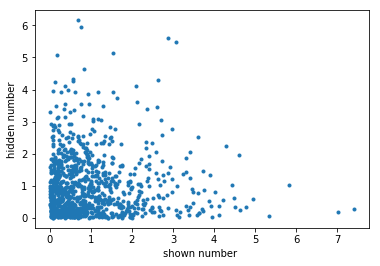

In [34]:
plt.plot(numbers_1, numbers_2, '.')
plt.xlabel("shown number ")
plt.ylabel("hidden number");

We can actually quantify what is the correlation between numbers 1 and 2. Since they were selected IID and at random, we should expect their correlation to be 0 (in the case of infinite data) or very small.

In [35]:
np.corrcoef(numbers_1.T, numbers_2.T)

array([[ 1.        , -0.00648812],
       [-0.00648812,  1.        ]])

Now we are going to make an assumption: we are always going to pick number 1 as what will be shown. Since numbers 1 and numbers 2 were selected IID, this is a sensible assumption. In other words, it doesn't matter which number is revealed and which kept hidden. 

We will call the number that is revealed `X` and the hidden numbers `Z`. We will also call the binary variable `y` anytime `Z  > X`.

In [36]:
X = numbers_1 # the number revealed
Z = numbers_2 # the hidden number
y = np.zeros(X.shape[0])
y[Z.squeeze() > X.squeeze()] = 1 # everytime time the hidden number Z is bigger than the shown number X

# Reinforcement Learning AI!!!!11

So let's now teach our agent how to play this game!! We essentially have a set of inputs `X` and set if targets `y` so we can use supervised learning for teaching our agent. We will be proper and split our data into a training and test set and to truly assess the ability of our agent learning this game. 

If we want to be fancy, we can claim that this is a simple version of policy gradients as done in Reinforcement Learning. However, since the way we have formed this problems involves no sequential decision making (just one decision), policy learning just boils down to supervised learning. 

In [37]:
num_train = X.shape[0]//2
X_train, y_train = X[:num_train], y[:num_train]
X_test, y_test = X[num_train:], y[num_train:]


There are numerous supervised learning algorithms that we can useand scikit-learn gives us a unified API to test out whatever we like. Here we will start with the most simple and popular method: Logistic Regression!

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()# logistic regression takes a lot of additional params
                          # but we will just leave everything as defaults!

In [39]:
clf.fit(X_train, y_train) # teach our agent with the training set only!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

OK, lets now see how accurate our models. Let's start by seeing if our agent learned the training set. We will measure the accuracy of how often the agent has guessed correctly. 50% means the agent is just guessing and is no good.

In [40]:
train_preds = clf.predict(X_train)
print("Train accuracy: " + str(100*np.mean(train_preds == y_train)) + "%")

Train accuracy: 76.2%


OK, but this is just a training set!! This doesn't mean that the agent has actually learned anything! So we should put our agent to the test with data it hasn't seen!

In [41]:
test_preds = clf.predict(X_test)
print("Test accuracy: " + str(100*np.mean(test_preds == y_test)) + "%")

Test accuracy: 70.0%


Logistic regression is just a linear equation that predicts the log-odds of either the number is bigger or smaller. You may remember from high school the following equation for:

$ y = mx +b$

That's exactly what logistic regression is: we have learned what $m$ (the slope) and $b$ (the intercept should be).

In [42]:
print("The hidden number is bigger if:")
print(" The shown number is %.2f times plus %.2f is positive. Otherwise, it is negative" % (clf.coef_[0][0], clf.intercept_[0]))


The hidden number is bigger if:
 The shown number is -2.25 times plus 1.81 is positive. Otherwise, it is negative


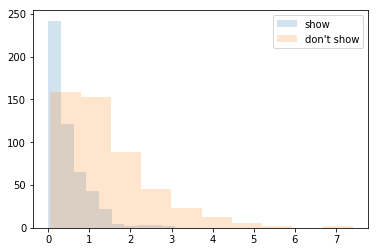

In [43]:
plt.hist(X[y==1], label = "show", alpha = .2);
plt.hist(X[y==0], label = "don't show", alpha = .2);
plt.legend();

In [13]:
np.mean(X[y==1]), np.mean(X[y==0])

(-0.6443471808328507, 0.5785859400965653)

# Let's use decision trees!



In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() # lets just use default params

In [25]:
clf.fit(X_train, y_train) # teach our agent with the training set only!

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
train_preds = clf.predict(X_train)
print("Train accuracy: " + str(100*np.mean(train_preds == y_train)) + "%")

Train accuracy: 100.0%


In [27]:
test_preds = clf.predict(X_test)
print("Test accuracy: " + str(100*np.mean(test_preds == y_test)) + "%")

Test accuracy: 67.0%


## Extensions:

Here are some questions to consider:

- Violation of statistical independence: Mark picks the two numbers strategically (eg: gonna pick 2 numbers super close!)
- What if instead of Sally picking the number, Marks selects which number to reveal?
- Violation of stationarity: Mark is getting tired of losing to Sally. He starts changing his strategy for selecting the random numbers. 
- Change the rewards: winning or losing for Sally has equal reward/loss. What if we change this? Make Sally lose more when she loses?

## What if Mark selects adversarial numbers  to maximally fool Sally?

- How do we learn a probability distribution function that is maximally hard to discriminate for winning? 

- This is the exact goal of GANs! Estimating a probability distribution using a Generator Network that maximally fools a Discriminator Network 


- We can use this game as a way to explore GAN architectures



## GANs produce amazing results after lots of effort

![gan-imgs](figures/gan-images.jpg)


![gan-actor](figures/GAN-actor-critic.png)


"Connecting Generative Adversarial Networks and Actor-Critic Methods" by David Pfau, Oriol Vinyals

![gan-actor](figures/bilevel.png)


"Connecting Generative Adversarial Networks and Actor-Critic Methods" by David Pfau, Oriol Vinyals